# TP Régression linéaire et logistique (data)

Dans ce TP nous utiliserons les bibliothèques et jeux de données suivants.

In [2]:
# Bibliothèques.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Préchargement des jeux de données.
df_1photon_x = pd.read_csv('datasets/jour1-1-facile/1photon-polar-x-alea.csv', sep=';')
df_1photon_y = pd.read_csv('datasets/jour1-1-facile/1photon-polar-y-alea.csv', sep=';')
df_1photon_45 = pd.read_csv('datasets/jour1-1-facile/1photon-polar-45-alea.csv', sep=';')

## Régression linéaire : utilisation basique

La régression linéaire permet de modéliser une dépendance linéaire, par exemple :

Prédiction : Y = 0.5173 * X + 0.2365


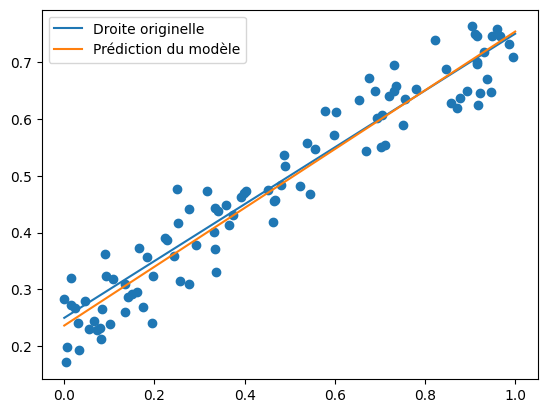

In [3]:
# Générons des données aléatoires vérifiant approximativement Y = aX+b
a, b, noise = 0.5, 0.25, 0.05
X = np.random.random((100,))
# On ajoute une constante pour la regression
XReg = sm.add_constant(X)
Y = np.dot(XReg,[b,a]) + np.random.normal(scale = noise, size = X.shape)

# Affichons-les, plus la droite originelle.
plt.scatter(X, Y)
Xideal = np.array([0,1]).reshape(-1, 1)
# On ajoute une constante pour la regression
XidealReg = sm.add_constant(Xideal)
plt.plot(Xideal, np.dot(XidealReg,[b,a]), label = 'Droite originelle')

# Retrouvons les coefficients par régression linéaire.
model = sm.OLS(Y,XReg).fit()
reg_b,reg_a = model.params

# Affichons-les et traçons la droite correspondante.
print(f'Prédiction : Y = {reg_a:.4f} * X + {reg_b:.4f}')
plt.plot(Xideal, model.predict(XidealReg), label = 'Prédiction du modèle')
_ = plt.legend()
plt.show()

Dans l'exemple on a vu la rélation linéaire entre les deux variables du type *$Y=aX+b$*. Avec statsmodels on compute le coeficient $'a'$, appellé '$X1$' et l'intersection '$b$' qui s'appelle '$Const$'.
Le paramètre '$b$' est calculé suite de l'utilisation de la fonction 'sm.add_constant', qui ajoute une colonne avec valuer **1** dans les colonnes de $X$. 


En plus des coefficients, l'estimateur fournit des paramètres permettant de quantifier la qualité de la régression et sa performance :

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1239.
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.07e-57
Time:                        23:18:32   Log-Likelihood:                 165.74
No. Observations:                 100   AIC:                            -327.5
Df Residuals:                      98   BIC:                            -322.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2365      0.008     28.619      0.000       0.220       0.253
x1             0.5173      0.015     35.195      0.000       0.488       0.546
==============================================================================
Omnibus:                        6.444   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                2.847
Skew:                           0.051   Prob(JB):                        0.241
Kurtosis:                       2.180   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Régression linéaire appliquée aux mesures de polarisation

Pour nos données de mesures, la dépendance est non-linéaire. Mais nous pouvons utiliser notre modèle en $\cos^2(\alpha-\theta)$ pour **transformer les données de façon à obtenir une dépendance linéaire**.

Utilisez le jeu de données `df_1photon_x`, en supposant — d'après son nom — que $\theta=0$. 
(On verra dans la suite qu'on peut estimer $\theta$ par maximum de vraisemblance.)
En estimant la probabilité d'observation en comptant les observations dans des intervalles d'angles, et en convertissant les angles en leur cosinus carré, on doit obtenir une dépendance linéaire.

Le coefficient $R^2$ peut être utilisé pour évaluer la qualité de la régression. Il indique à quel point la variance des données est expliquée par le modèle. 

**Testez également les jeux de données `df_1photon_45` et `df_1photon_y`. Qu'est-ce qui est différent ?**

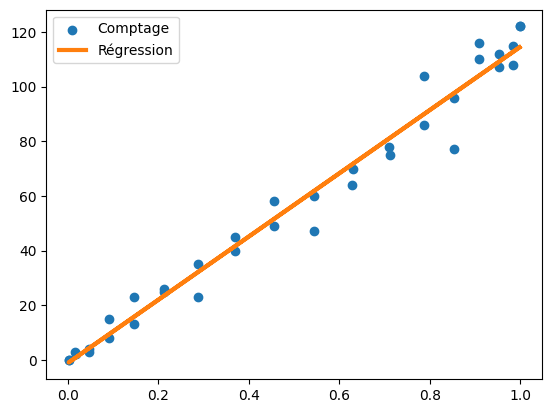

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1307.
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.02e-28
Time:                        23:18:33   Log-Likelihood:                -119.02
No. Observations:                  36   AIC:                             242.0
Df Residuals:                      34   BIC:                             245.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1541      1.960     -0.589      0.560      -5.138       2.829
x1           115.7537      3.202     36.148      0.000     109.246     122.261
==============================================================================
Omnibus:                        7.355   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.578
Skew:                          -0.684   Prob(JB):                       0.0373
Kurtosis:                       4.585   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
data = df_1photon_x

# Comptage des observations dans des intervalles de 5°.
obs = data.alpha[(data.X == 1) & (data.Y == 0)].to_numpy()
(comptage, alpha_bords) = np.histogram(obs, bins = 36)

# Calcul de cos²(α), où α est pris au centre des intervalles.
# Conversion en tableau 2D pour les besoins de l'estimateur.
alpha_centres = 0.5 * (alpha_bords[0:-1] + alpha_bords[1:])
cos2_alpha = (np.cos(np.radians(alpha_centres)) ** 2).reshape(-1,1)
# On ajoute une constante pour la regression
cos2_alphaReg = sm.add_constant(cos2_alpha)

# Régression linéaire.
reg = sm.OLS(comptage, cos2_alphaReg).fit()

# Tracé des comptages et de la régression trouvée.
plt.scatter(cos2_alpha, comptage, label = 'Comptage')
plt.plot(
    cos2_alpha,
    reg.predict(cos2_alphaReg),
    linewidth = 3,
    color = 'tab:orange',
    label = 'Régression'
)
plt.legend()
plt.show()

# Affichage des scores.
reg.summary()

## Régression linéaire appliquée aux mesures de polarisation

On utilise encore le jeu de données `df_1photon_x`. 


En estimant la présence de polarisations pour les angles observés, et en convertissant les angles en leur cosinus carré, on doit obtenir une dépendance.

Dans cette partie on va vérifier la dépendence linéaire entre ces variables.


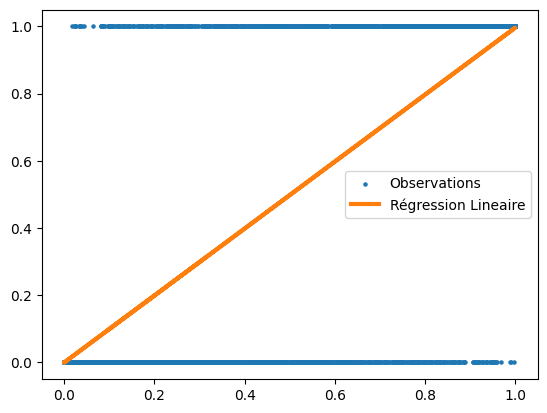

In [11]:
# Visualizer la transformation cosinus avec la régression linéaire
Xcos = (np.cos(np.radians(df_1photon_x.alpha.to_numpy())) ** 2).reshape(-1,1)
XcosReg = sm.add_constant(Xcos)
Ybin = ((df_1photon_x.X == 1) & (df_1photon_x.Y == 0)).to_numpy().astype(int)
reg = sm.OLS(Ybin, XcosReg).fit(disp = 0)
plt.scatter(Xcos,Ybin,5, label = 'Observations')
plt.plot(
    Xcos,
    reg.predict(XcosReg),
    linewidth = 3,
    color = 'tab:orange',
    label = 'Régression Lineaire'
)
plt.legend()
plt.show()

## Régression logistique appliquée aux mesures de polarisation

La régression linéaire n'a pas été suffisante pour estimer les paramètres du système. 

On va essayer une autre manière pour faire l'estimation : la **régression logistique**

La régression logistique est utilisée pour classifier et prédire une variable discrète / binaire.

Optimization terminated successfully.
         Current function value: 0.394336
         Iterations 6


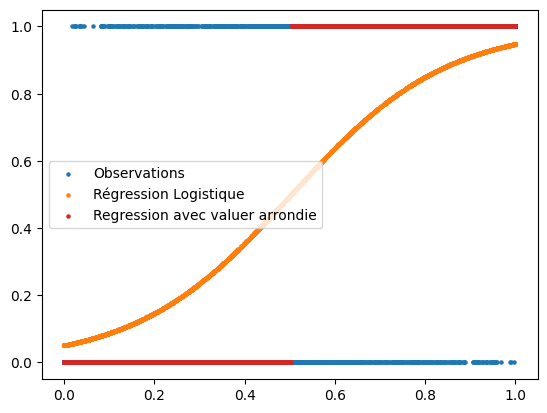

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4096
Model:                          Logit   Df Residuals:                     4094
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Feb 2026   Pseudo R-squ.:                  0.4311
Time:                        23:22:36   Log-Likelihood:                -1615.2
converged:                       True   LL-Null:                       -2839.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9267      0.091    -32.036      0.000      -3.106      -2.748
x1             5.8221      0.159     36.692      0.000       5.511       6.133
==============================================================================
"""

In [13]:
# Visualizer la régression logistique 
Xcos = (np.cos(np.radians(df_1photon_x.alpha.to_numpy())) ** 2).reshape(-1,1)
XcosReg = sm.add_constant(Xcos)
Ybin = ((df_1photon_x.X == 1) & (df_1photon_x.Y == 0)).to_numpy().astype(int)
reg = sm.Logit(Ybin, XcosReg).fit()
plt.scatter(Xcos,Ybin,5, label = 'Observations')
plt.scatter(
    Xcos,
    reg.predict(XcosReg),
    5,
    color = 'tab:orange',
    label = 'Régression Logistique'
)
plt.scatter(
    Xcos,
    np.round(reg.predict(XcosReg)),
    5,
    color = 'tab:red',
    label = 'Regression avec valuer arrondie'
)
plt.legend()
plt.show()
reg.summary()

In [8]:
for (name, test_angle, data) in (('X', 0, df_1photon_x),
                                 ('45°', 0, df_1photon_45),
                                 ('45°', 45, df_1photon_45),
                                ):
    # Calcul de cos²(α-θ) (sous forme de tableau 2D) et de l'observation (tableau 1D).
    cos2_alpha = (np.cos(np.radians(data.alpha.to_numpy() - test_angle)) ** 2).reshape(-1,1)
    obs = ((data.X == 1) & (data.Y == 0)).to_numpy()
    # Calcul de la p-valeur des coefficients en régression logistique.
    clf = sm.Logit(obs, sm.add_constant(cos2_alpha))
    reg = clf.fit(disp = 0)
    print(f'test data: {name}, {test_angle=}°\t→ {reg.pvalues=}')
    

test data: X, test_angle=0°	→ reg.pvalues=array([3.49031029e-225, 9.66710405e-295])
test data: 45°, test_angle=0°	→ reg.pvalues=array([0.91021137, 0.28542149])
test data: 45°, test_angle=45°	→ reg.pvalues=array([2.06901492e-216, 2.08652539e-290])


## Estimation de $\theta$ par maximum de vraisemblance

Améliorez le code ci-dessus afin de trouver, à 10° près, l'angle $\theta$ le plus vraisemblable, en considérant que c'est celui qui correspond à la p-valeur la plus faible dans la régression logistique. Appliquez la méthode aux divers jeux de données à votre disposition.